<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/Self_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solution of Limitations of RNNs/LSTMs/GRUs: Transformers!**
*  **Parallel Processing** – Entire sentences are processed at once.
*  **Better Long-Range Dependencie**s – Uses Self-Attention to connect all words.
*  **State-of-the-Art NLP Performance** – Used in GPT, BERT, T5, etc.

**Understanding Self-Attention – The Heart of Transformers**

The Self-Attention Mechanism allows a model to focus on different words in a sentence when making predictions.

**Example Sentence:**

👉 "The animal didn’t cross the road because it was too tired."

💡 Question: What does "it" refer to?

"The animal" or "the road"?
A traditional RNN/LSTM would struggle with this, but **Self-Attention** allows the model to assign attention scores to different words!

3. **How Self-Attention Works Step by Step**

Transformers compute Self-Attention in three steps:
1.  Compute Query (Q), Key (K), and Value (V).
2.  Compute Attention Scores using dot-product similarity.
3.  Generate Weighted Output by applying attention scores to values.

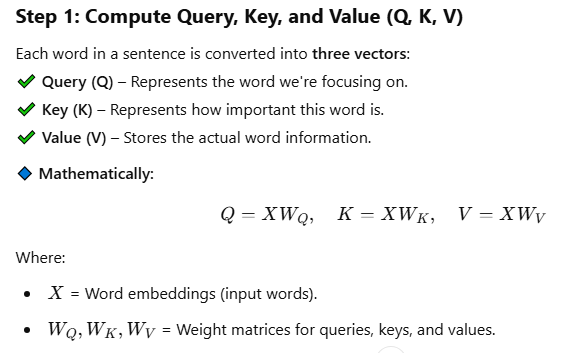

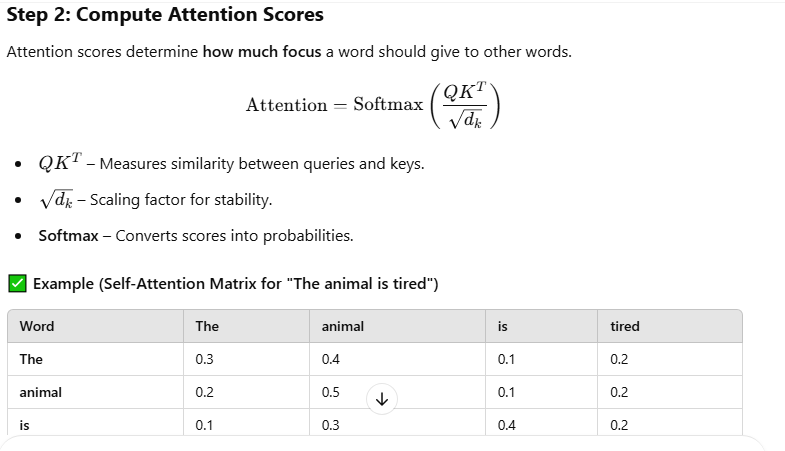

**Step 3: Compute Weighted Output**

The attention scores are applied to the Value (V) matrix to compute the final weighted output:

Output=Attention×V

This ensures that important words get more weight, helping the model make better predictions.



In [8]:
# Define Self-Attention Mechanism
import numpy as np
def self_attention(Q, K, V):
  d_k=Q.shape[-1] # Dimension of key/query vectors
  attention_score=np.dot(Q, K.T)/np.sqrt(d_k) ## Compute QK^T / sqrt(d_k)
  '''Attention weights are values that determine how much focus a Transformer model should give to different words
   in an input sequence. These weights are calculated in the self-attention mechanism,
   allowing the model to understand the relationships between words in a sentence.'''
  attention_weight=np.exp(attention_score)/np.sum(np.exp(attention_score), axis=1, keepdims=True) ## Softmax
  output=np.dot(attention_weight, V)
  return output, attention_weight

In [9]:
#Generate Sample Input Data
# Generate random input (4 words, embedding size 3)
X=np.random.rand(4,3)
# Weight matrices for Query, Key, Value (random for simplicity)
W_q=np.random.rand(3,3)
W_k=np.random.rand(3,3)
W_v=np.random.rand(3,3)

# Compute Q, K, V matrices
Q=np.dot(X, W_q)
K=np.dot(X, W_k)
V=np.dot(X, W_v)

# Apply Self-Attention
output, attention_weight=self_attention(Q, K, V)
print(f"Output: {output}")
print(f"Attention Weights: {attention_weight}")

Output: [[0.95276248 1.11882646 0.64252281]
 [0.93461809 1.09653434 0.63478678]
 [0.97601091 1.14691797 0.65377764]
 [0.96074847 1.12855411 0.64617865]]
Attention Weights: [[0.19313145 0.20400379 0.37487861 0.22798614]
 [0.21377095 0.22403868 0.32646554 0.23572483]
 [0.16786977 0.18185341 0.437314   0.21296282]
 [0.18437708 0.1958235  0.39628993 0.22350949]]


✅ **Limitations of Single Self-Attention:**
1. Focuses on only one aspect of relationships between words.
2. Might miss important connections in complex sentences.

**Multi-Head Attention: The Solution**
Multi-Head Attention allows the model to:
* Look at different aspects of word relationships simultaneously.
* Capture different meanings of words depending on the context.
* Improve performance in complex NLP tasks.

**How Multi-Head Attention Works**

Instead of one attention mechanism, we use multiple attention heads, each focusing on different relationships between words.

*Step-by-Step Process:*
1. Create multiple sets of Query (Q), Key (K), and Value (V) matrices.
2. Each head computes attention independently.
3. Merge outputs of all heads into a final representation.

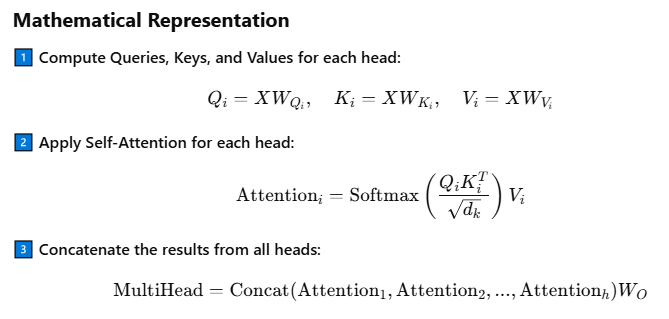

In [12]:
# Multi-Head Attention function
def multi_head_attention(X, num_heads=3, d_model=6): # Changed num_heads to 3, which divides d_model (6) evenly.
    assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
    d_k = d_model // num_heads  # Dimension per head

    # Create weight matrices for each head
    W_Q = [np.random.rand(X.shape[1], d_k) for _ in range(num_heads)]
    W_K = [np.random.rand(X.shape[1], d_k) for _ in range(num_heads)]
    W_V = [np.random.rand(X.shape[1], d_k) for _ in range(num_heads)]

    # Compute Attention for each head
    attention_outputs = []
    for i in range(num_heads):
        Q = np.dot(X, W_Q[i])
        K = np.dot(X, W_K[i])
        V = np.dot(X, W_V[i])
        output, _ = self_attention(Q, K, V)
        attention_outputs.append(output)

    # Concatenate outputs from all heads
    multi_head_output = np.concatenate(attention_outputs, axis=-1)

    return multi_head_output

In [13]:
# Generate random input (4 words, embedding size 6)
X = np.random.rand(4, 6)

# Apply Multi-Head Attention
output = multi_head_attention(X)

# Print Output
print("Multi-Head Attention Output:\n", output)

Multi-Head Attention Output:
 [[1.08471842 1.71078394 2.44206131 2.56851028 1.81150383 1.86582438]
 [1.10989115 1.72667679 2.47754925 2.5918459  1.82194208 1.88584726]
 [1.08766832 1.71266686 2.43793865 2.56344386 1.8008393  1.84753946]
 [1.1420561  1.74698008 2.54040338 2.63490561 1.8347548  1.91728601]]


Positional Encoding – Why Do We Need It?
Transformers process words simultaneously (unlike RNNs), meaning they don't know word order.

**✅ Example Issue:**
*  "I love NLP"
*  "NLP love I"

Without knowing word order, Transformers may treat these sentences as the same!

**💡 Solution: Positional Encoding**

We add a unique position vector to each word to indicate its order.
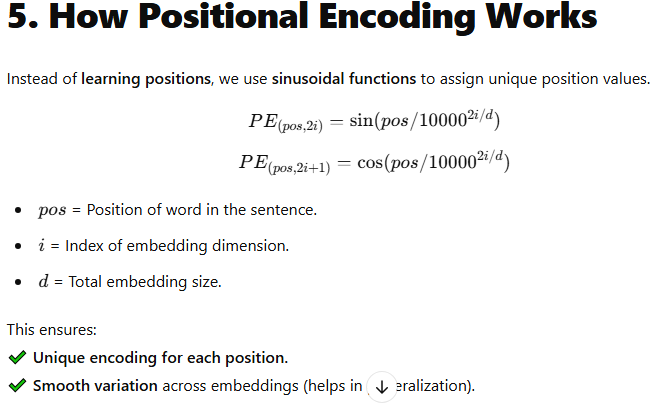

In [19]:
def positional_encoding(seq_len, d_model):
  PE = np.zeros((seq_len, d_model))  # Changed to pass shape as a tuple
  for pos in range(seq_len):
    for i in range(0, d_model, 2):
      PE[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
      PE[pos, i + 1] = np.cos(pos / (10000 ** ((2 * i) / d_model)))
  return PE

In [18]:
# Example usage
seq_len = 10  # Number of words
d_model = 6   # Embedding size
PE = positional_encoding(seq_len, d_model)

# Print the first few positional encodings
print("Positional Encoding:\n", PE[:5])

Positional Encoding:
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  2.15443302e-03  9.99997679e-01
   4.64158883e-06  1.00000000e+00]
 [ 9.09297427e-01 -4.16146837e-01  4.30885605e-03  9.99990717e-01
   9.28317767e-06  1.00000000e+00]
 [ 1.41120008e-01 -9.89992497e-01  6.46325907e-03  9.99979113e-01
   1.39247665e-05  1.00000000e+00]
 [-7.56802495e-01 -6.53643621e-01  8.61763209e-03  9.99962868e-01
   1.85663553e-05  1.00000000e+00]]
